<a href="https://colab.research.google.com/github/Mahwish-source/pydata-lab/blob/main/num_plate_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 

In [ ]:
# Cell 2: Download dataset from Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="918WcyMWpSUn3V1K4xc7")
project = rf.workspace("fyp-l87nq").project("bone-fracture-detection-rkuqr")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bone-fracture-detection-3 in yolov8:: 100%|██████████| 10158/10158 [00:01<00:00, 7065.38it/s]


In [ ]:
import os

# Set up the path to the dataset's YAML file
data_path = os.path.join(dataset.location, "/content/bone-fracture-detection-3/data.yaml")
print(f"Dataset YAML file located at: {data_path}")


Dataset YAML file located at: /content/bone-fracture-detection-3/data.yaml


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 Nano model (for fast training, you can try larger versions like yolov8s.pt or yolov8m.pt later)
model = YOLO("yolov8n.pt")


In [ ]:
# Start training the YOLOv8 model on your lung disease dataset
model.train(data=data_path, epochs=50, imgsz=640, batch=16, name="bone-fracture-detection-3")

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/bone-fracture-detection-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bone-fracture-detection-33, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

100%|██████████| 755k/755k [00:00<00:00, 81.5MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 284MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 980.0±379.5 MB/s, size: 40.5 KB)


train: Scanning /content/bone-fracture-detection-3/train/labels... 4686 images, 6 backgrounds, 0 corrupt: 100%|██████████| 4686/4686 [00:02<00:00, 2250.43it/s]

train: New cache created: /content/bone-fracture-detection-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 681.8±398.8 MB/s, size: 39.5 KB)


val: Scanning /content/bone-fracture-detection-3/valid/labels... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<00:00, 666.50it/s]

val: New cache created: /content/bone-fracture-detection-3/valid/labels.cache


Plotting labels to runs/detect/bone-fracture-detection-33/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/bone-fracture-detection-33
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.03G      1.197      1.981      1.524         35        640: 100%|██████████| 293/293 [01:26<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        294        331      0.765      0.514       0.55      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.51G      1.175      1.331      1.478         34        640: 100%|██████████| 293/293 [01:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]

                   all        294        331      0.602      0.542      0.534      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.52G      1.167        1.2      1.454         35        640: 100%|██████████| 293/293 [01:23<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

                   all        294        331      0.722      0.545      0.567       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.54G      1.142      1.103      1.423         34        640: 100%|██████████| 293/293 [01:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.74it/s]


                   all        294        331      0.651      0.521       0.54      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.56G      1.089      1.028      1.396         28        640: 100%|██████████| 293/293 [01:24<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]

                   all        294        331      0.557      0.537        0.5      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.57G      1.066     0.9907      1.366         36        640: 100%|██████████| 293/293 [01:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

                   all        294        331      0.638      0.557      0.579      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.59G      1.036     0.9499      1.349         48        640: 100%|██████████| 293/293 [01:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.78it/s]

                   all        294        331      0.741      0.599       0.64      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.61G      1.018     0.9137      1.332         29        640: 100%|██████████| 293/293 [01:24<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]

                   all        294        331      0.855      0.557      0.632      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.62G      1.011     0.8913      1.324         25        640: 100%|██████████| 293/293 [01:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        294        331       0.74      0.584      0.615      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.64G     0.9917     0.8657      1.311         41        640: 100%|██████████| 293/293 [01:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

                   all        294        331      0.888      0.602      0.684      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.66G     0.9809     0.8569      1.301         33        640: 100%|██████████| 293/293 [01:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

                   all        294        331      0.822       0.56      0.625      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.68G     0.9596     0.8154      1.284         31        640: 100%|██████████| 293/293 [01:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]

                   all        294        331       0.69       0.65       0.65      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.69G       0.95     0.8164      1.278         40        640: 100%|██████████| 293/293 [01:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

                   all        294        331      0.803      0.609      0.675      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.71G      0.943     0.7869      1.274         31        640: 100%|██████████| 293/293 [01:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        294        331      0.845      0.602      0.679      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.73G     0.9274     0.7779      1.262         36        640: 100%|██████████| 293/293 [01:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]

                   all        294        331      0.853      0.654      0.713      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.74G     0.9296     0.7692      1.256         42        640: 100%|██████████| 293/293 [01:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]

                   all        294        331      0.842       0.63      0.682      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.76G     0.9318     0.7688      1.254         29        640: 100%|██████████| 293/293 [01:21<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.36it/s]

                   all        294        331      0.805      0.614      0.668      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.78G     0.9124     0.7581       1.25         32        640: 100%|██████████| 293/293 [01:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        294        331      0.841      0.626      0.701      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.79G     0.9113     0.7331      1.242         29        640: 100%|██████████| 293/293 [01:21<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]

                   all        294        331      0.816      0.637      0.682      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.81G     0.8932     0.7122      1.241         27        640: 100%|██████████| 293/293 [01:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.78it/s]

                   all        294        331      0.835      0.636      0.699      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.83G     0.8848     0.7118      1.233         27        640: 100%|██████████| 293/293 [01:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.53it/s]

                   all        294        331        0.9      0.634      0.713      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.85G     0.8957       0.71      1.234         34        640: 100%|██████████| 293/293 [01:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.72it/s]

                   all        294        331      0.857      0.647       0.71      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.86G     0.8667     0.6921      1.219         32        640: 100%|██████████| 293/293 [01:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]

                   all        294        331      0.807      0.647      0.704      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.88G     0.8757     0.6931      1.217         35        640: 100%|██████████| 293/293 [01:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.92it/s]

                   all        294        331       0.93      0.628      0.719      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.9G     0.8674     0.6974      1.216         21        640: 100%|██████████| 293/293 [01:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.42it/s]

                   all        294        331      0.889      0.631      0.704      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.92G     0.8791     0.6826      1.215         35        640: 100%|██████████| 293/293 [01:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]

                   all        294        331       0.96       0.64      0.727       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.93G     0.8639     0.6765      1.215         31        640: 100%|██████████| 293/293 [01:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.32it/s]


                   all        294        331      0.921      0.649       0.73       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.95G     0.8435     0.6499      1.201         33        640: 100%|██████████| 293/293 [01:21<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]

                   all        294        331      0.892       0.65      0.726      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.97G     0.8442     0.6563      1.197         35        640: 100%|██████████| 293/293 [01:21<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]


                   all        294        331      0.827      0.652      0.718      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.98G      0.844     0.6481      1.197         38        640: 100%|██████████| 293/293 [01:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]

                   all        294        331      0.871      0.668       0.74       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         3G     0.8314     0.6282      1.189         34        640: 100%|██████████| 293/293 [01:21<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]

                   all        294        331      0.897      0.679      0.745       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.02G     0.8374     0.6269      1.187         33        640: 100%|██████████| 293/293 [01:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

                   all        294        331      0.862      0.683      0.738      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.04G     0.8337      0.624      1.187         29        640: 100%|██████████| 293/293 [01:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        294        331      0.946      0.648       0.75      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.05G     0.8208     0.6307      1.187         24        640: 100%|██████████| 293/293 [01:21<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

                   all        294        331      0.892      0.666      0.747      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.07G     0.8171     0.6128       1.18         36        640: 100%|██████████| 293/293 [01:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]


                   all        294        331      0.903      0.656      0.748       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.09G     0.8115     0.6058      1.171         27        640: 100%|██████████| 293/293 [01:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

                   all        294        331      0.915      0.669      0.751      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       3.1G     0.8038     0.6043      1.167         33        640: 100%|██████████| 293/293 [01:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]

                   all        294        331      0.902      0.677      0.749      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.12G     0.7984     0.5884      1.169         28        640: 100%|██████████| 293/293 [01:21<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]

                   all        294        331      0.888      0.695      0.766      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.14G     0.8066     0.5836      1.165         32        640: 100%|██████████| 293/293 [01:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]

                   all        294        331      0.884      0.679      0.753      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.15G     0.7924     0.5724      1.161         32        640: 100%|██████████| 293/293 [01:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

                   all        294        331      0.824      0.718      0.767      0.565


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.17G     0.9102     0.5935      1.215         14        640: 100%|██████████| 293/293 [01:20<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        294        331      0.911      0.707      0.768       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.19G     0.8893     0.5726      1.203         16        640: 100%|██████████| 293/293 [01:18<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

                   all        294        331      0.879      0.693      0.755       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.21G     0.8763     0.5637      1.197         18        640: 100%|██████████| 293/293 [01:18<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]

                   all        294        331      0.908      0.693      0.769      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.22G     0.8721     0.5561       1.19         21        640: 100%|██████████| 293/293 [01:18<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]

                   all        294        331      0.879      0.696      0.766      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.24G     0.8635     0.5471       1.18         19        640: 100%|██████████| 293/293 [01:18<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        294        331      0.916      0.692      0.775      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.26G     0.8511      0.542      1.176         19        640: 100%|██████████| 293/293 [01:17<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]

                   all        294        331      0.913      0.701      0.777      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.27G     0.8434     0.5346      1.174         19        640: 100%|██████████| 293/293 [01:18<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.52it/s]

                   all        294        331      0.884       0.71      0.778      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.29G     0.8374     0.5263      1.166         18        640: 100%|██████████| 293/293 [01:18<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]

                   all        294        331      0.889      0.698      0.773       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.31G     0.8331     0.5174      1.163         19        640: 100%|██████████| 293/293 [01:18<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

                   all        294        331      0.917      0.698      0.775       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.33G      0.836     0.5147      1.169         15        640: 100%|██████████| 293/293 [01:19<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.05it/s]

                   all        294        331      0.901      0.704      0.775      0.574



50 epochs completed in 1.182 hours.
Optimizer stripped from runs/detect/bone-fracture-detection-33/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/bone-fracture-detection-33/weights/best.pt, 6.2MB

Validating runs/detect/bone-fracture-detection-33/weights/best.pt...
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


                   all        294        331      0.886       0.71      0.778      0.575
         bone fracture        142        179      0.905      0.453      0.569      0.299
          not fracture        152        152      0.867      0.967      0.987       0.85
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/bone-fracture-detection-33


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf197e59fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

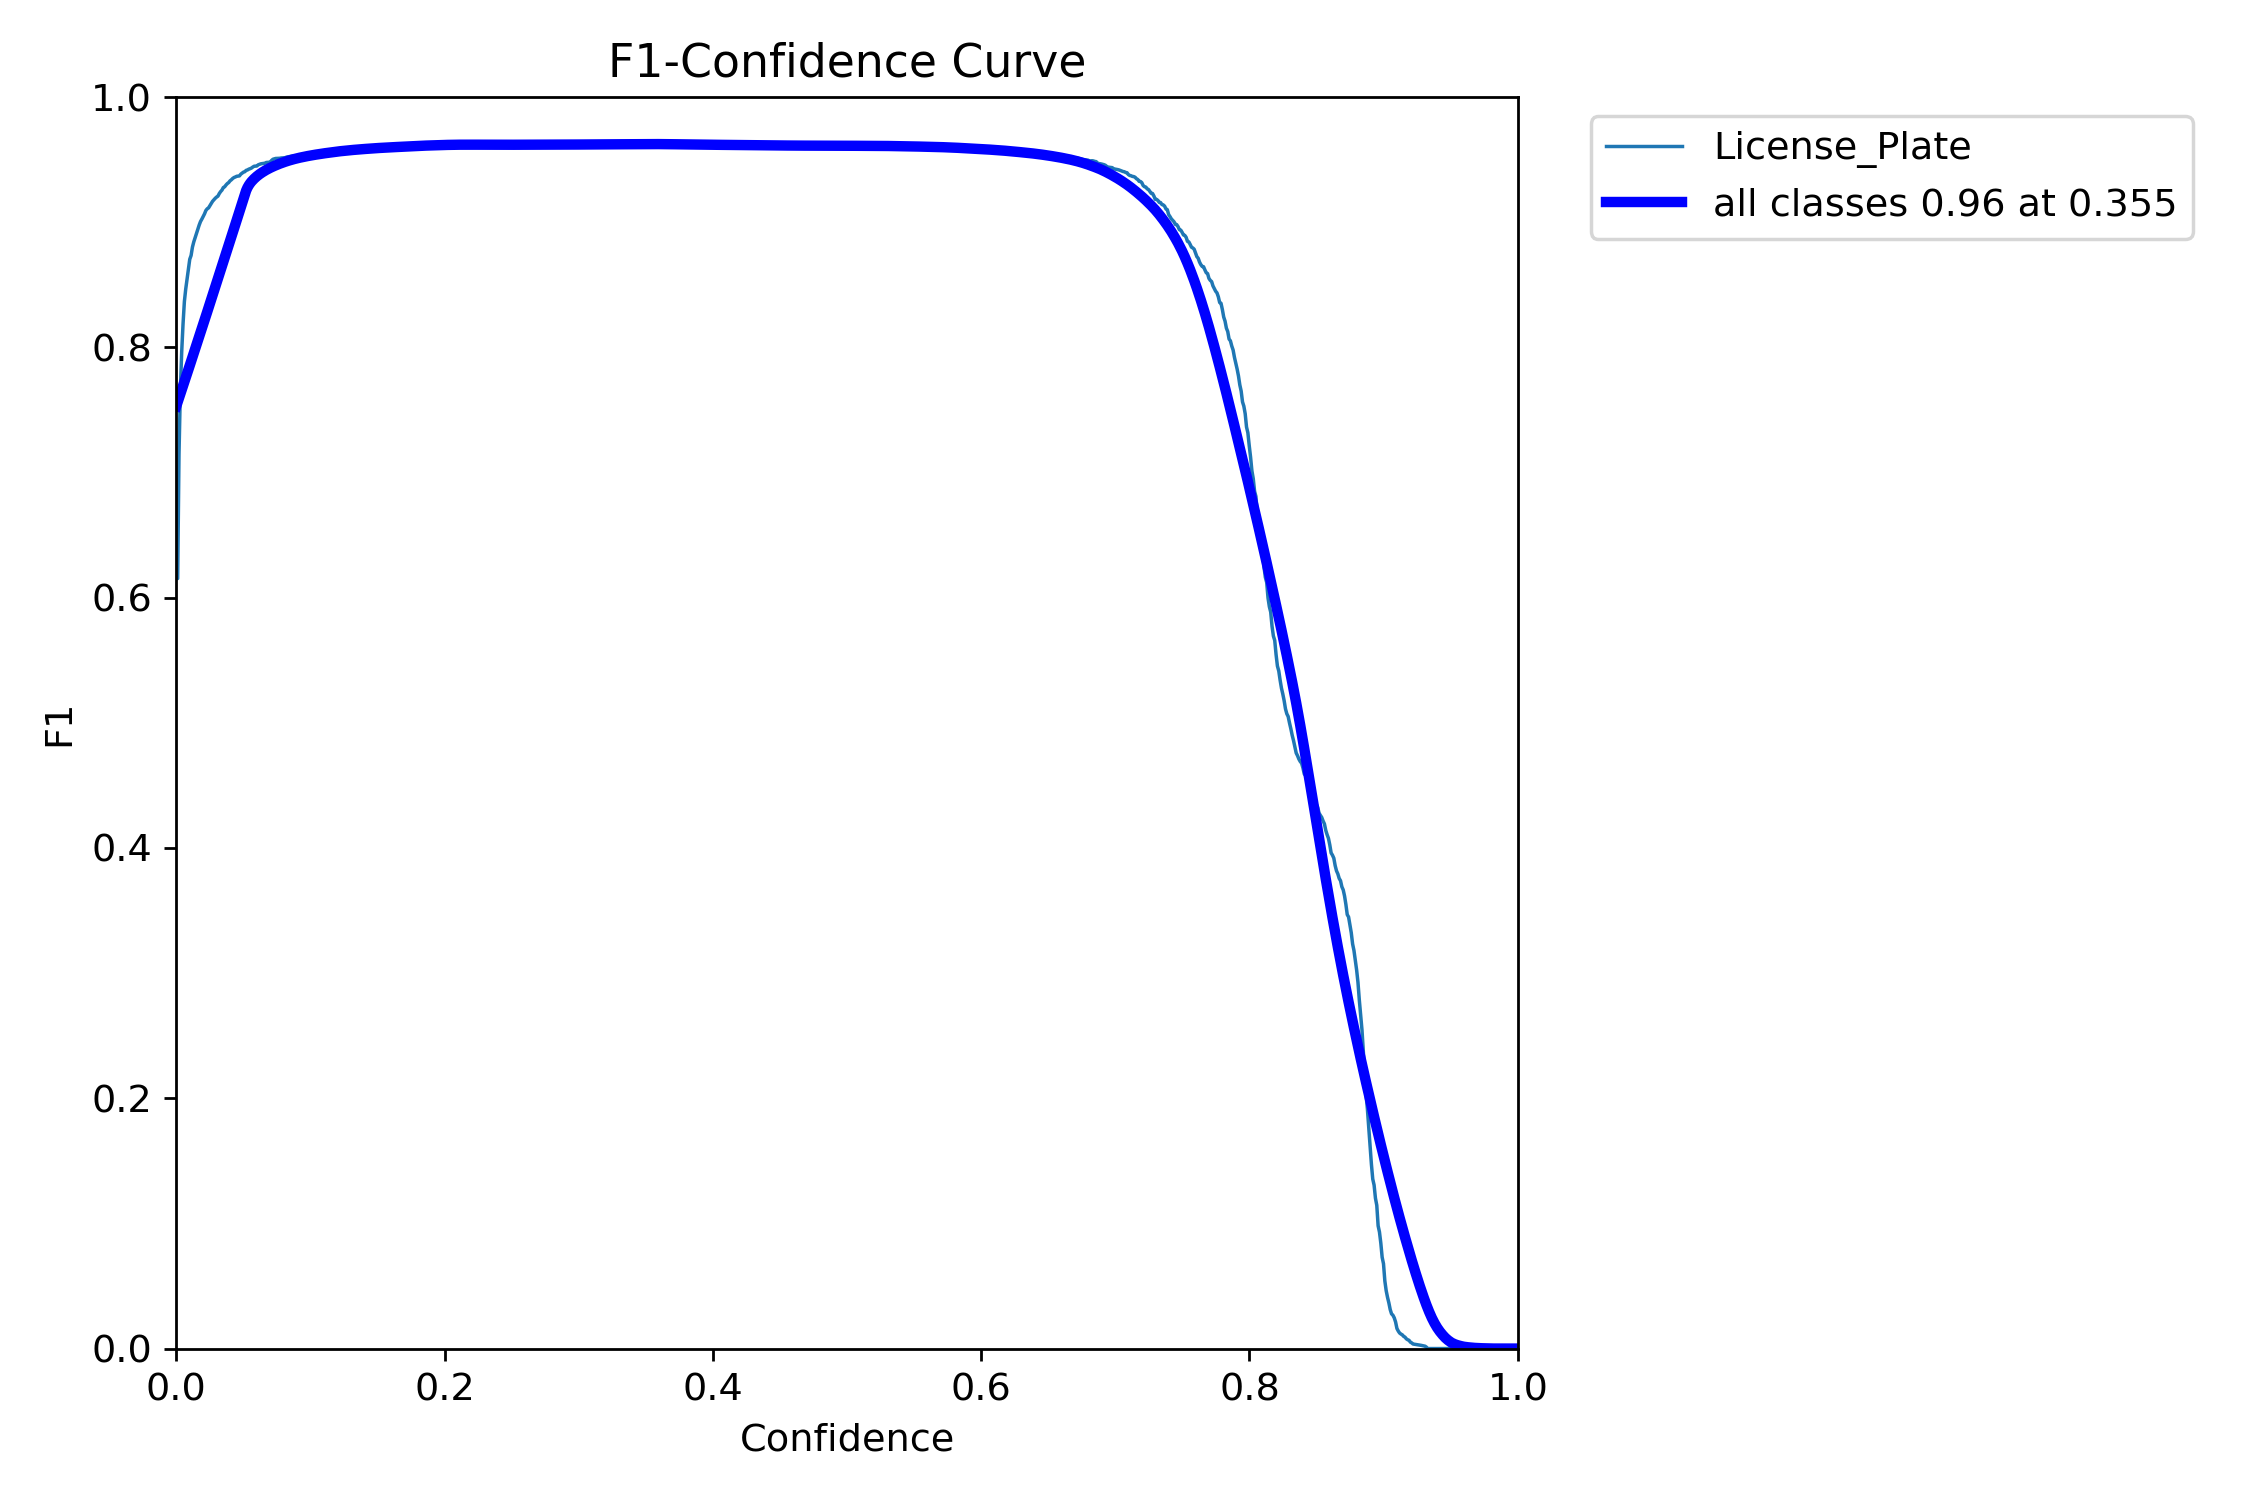

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/F1_curve.png', width=600)

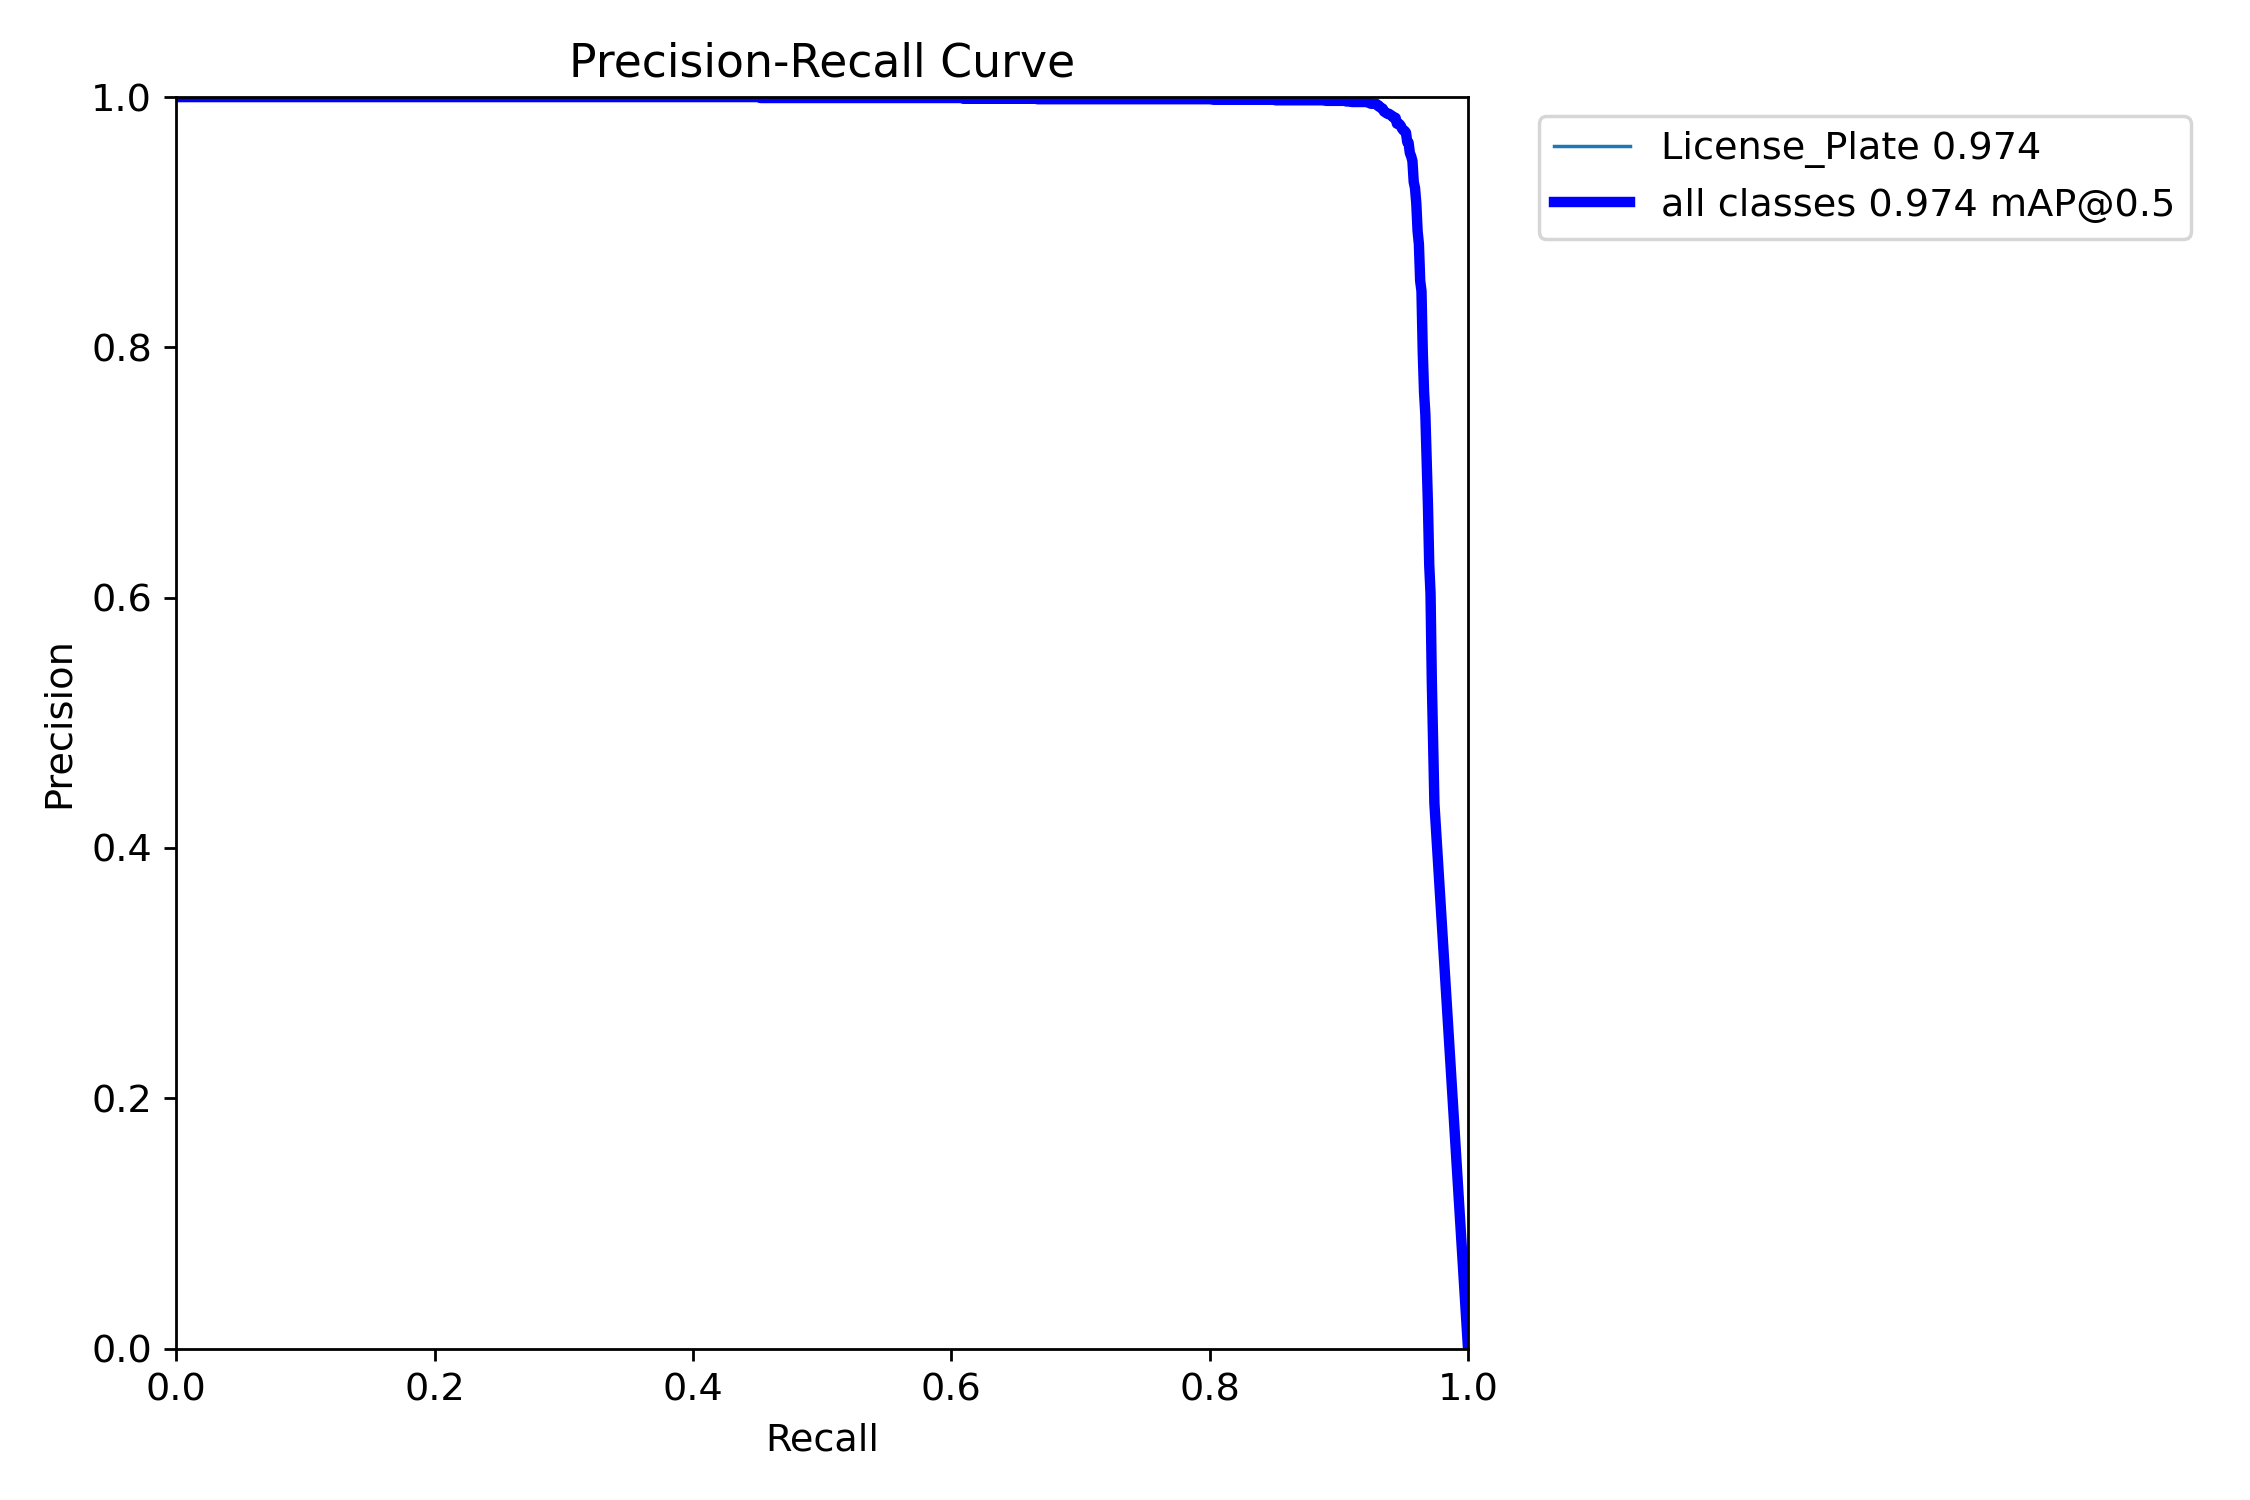

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/PR_curve.png', width=600)

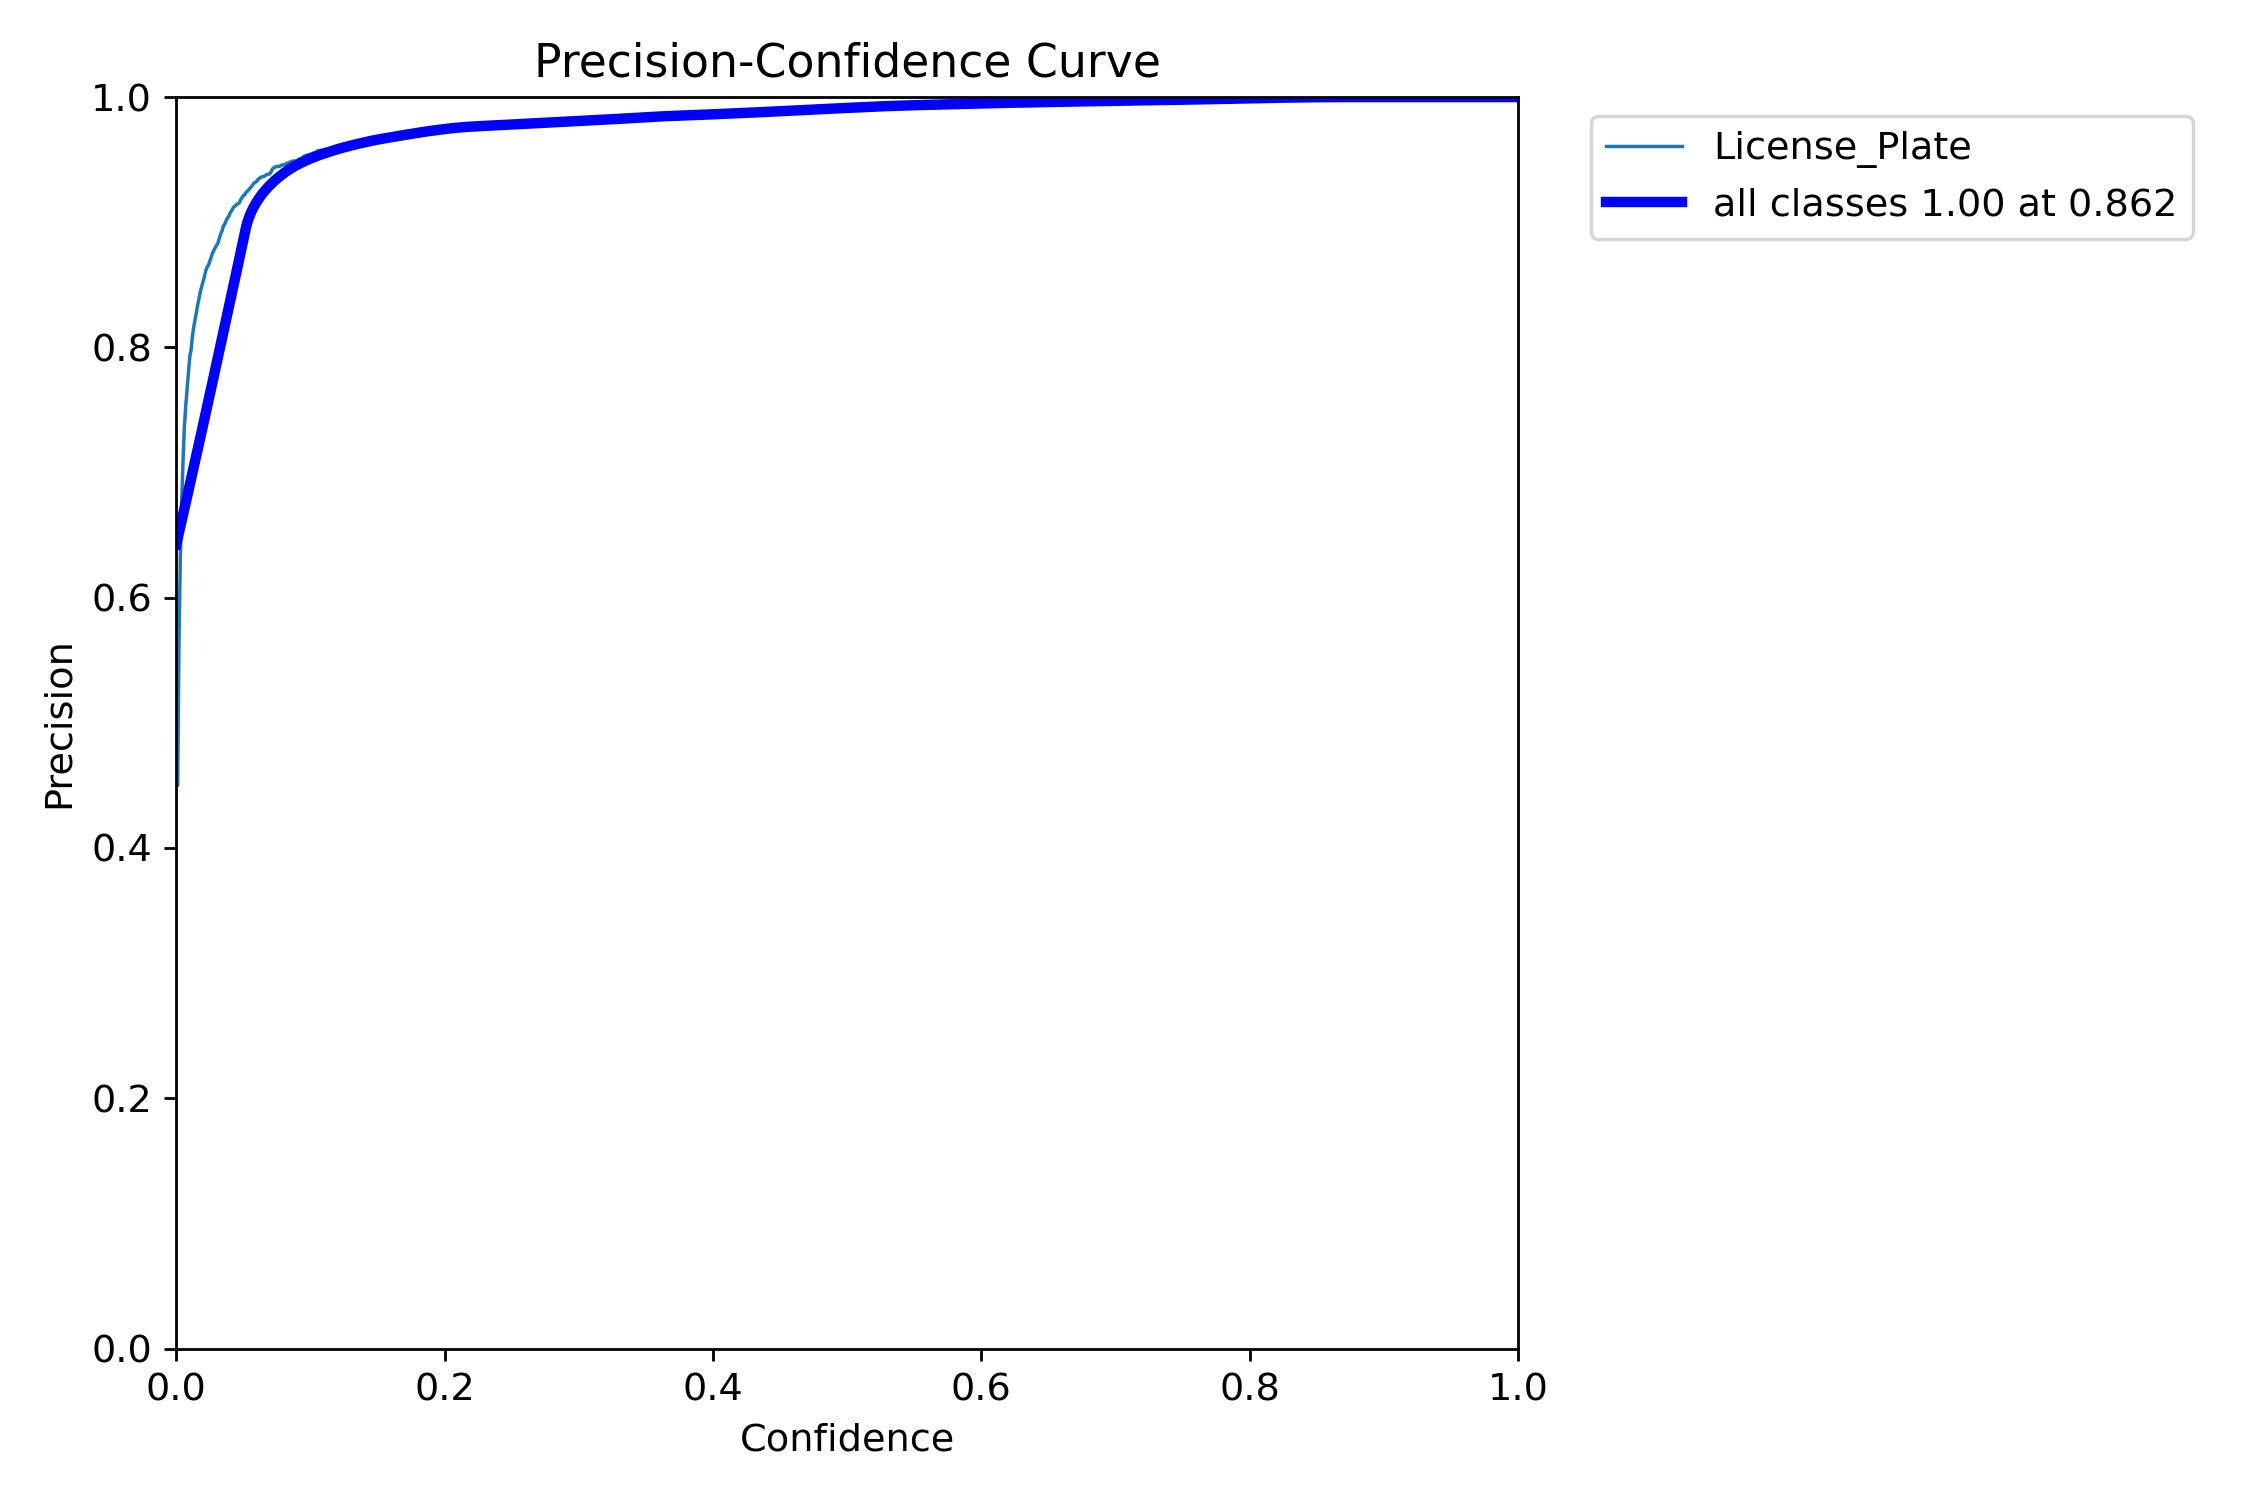

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/P_curve.png', width=600)

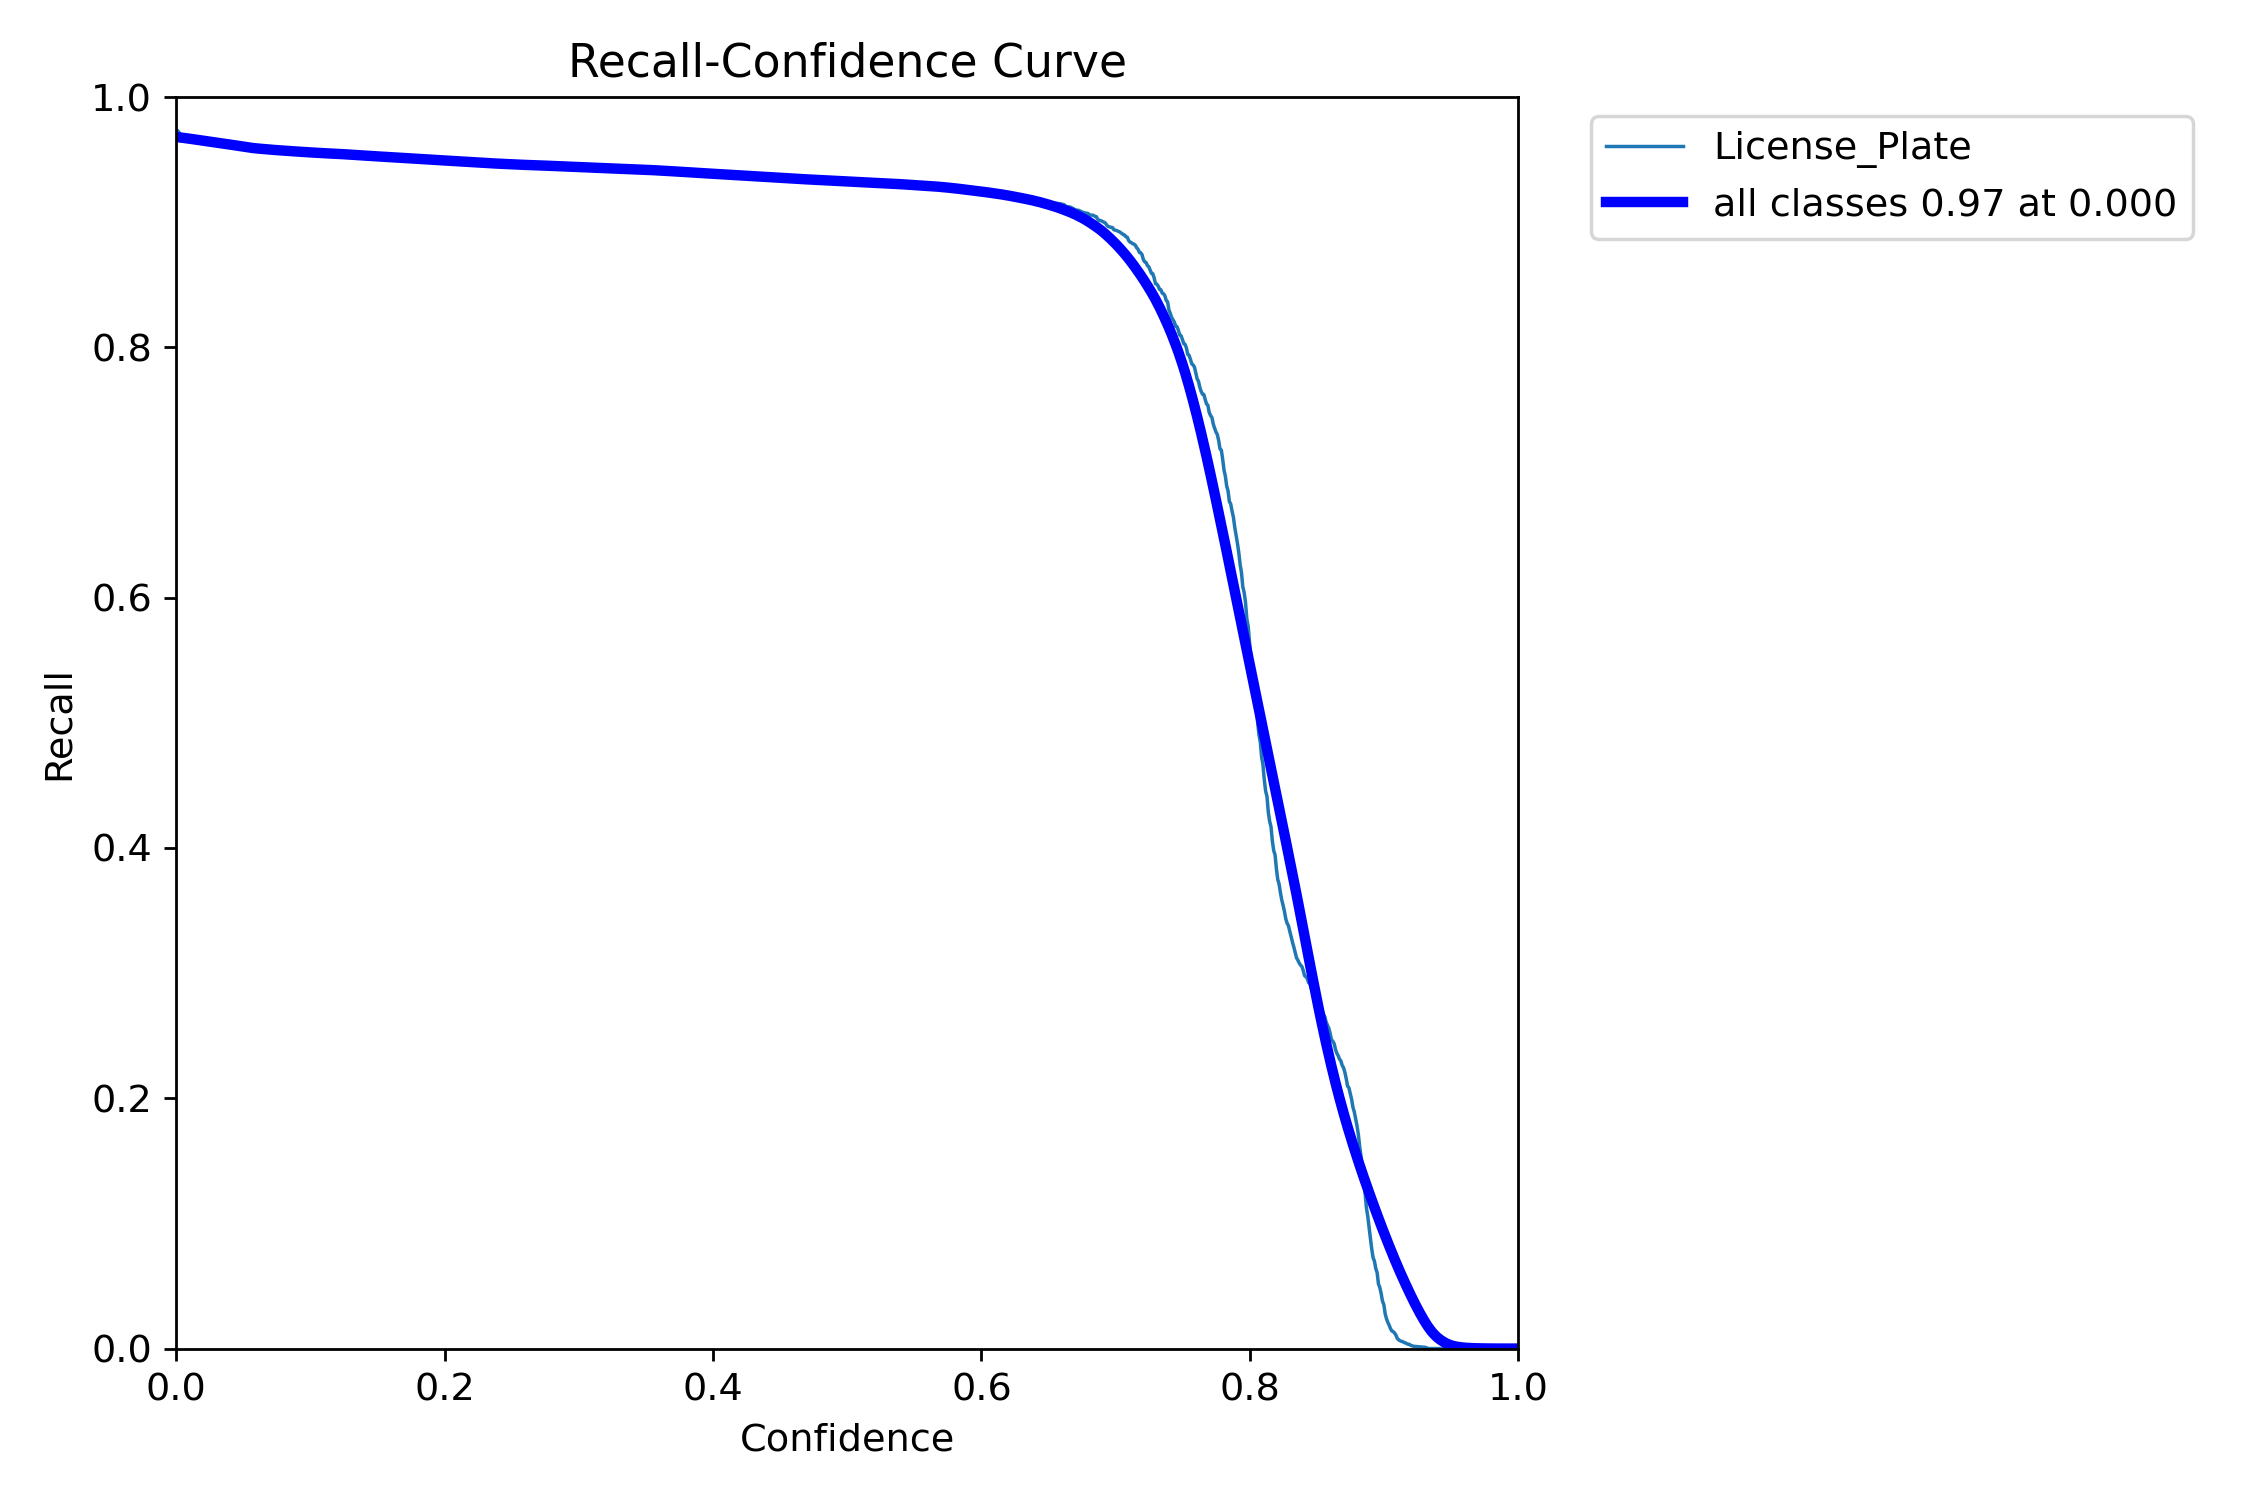

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/R_curve.png', width=600)

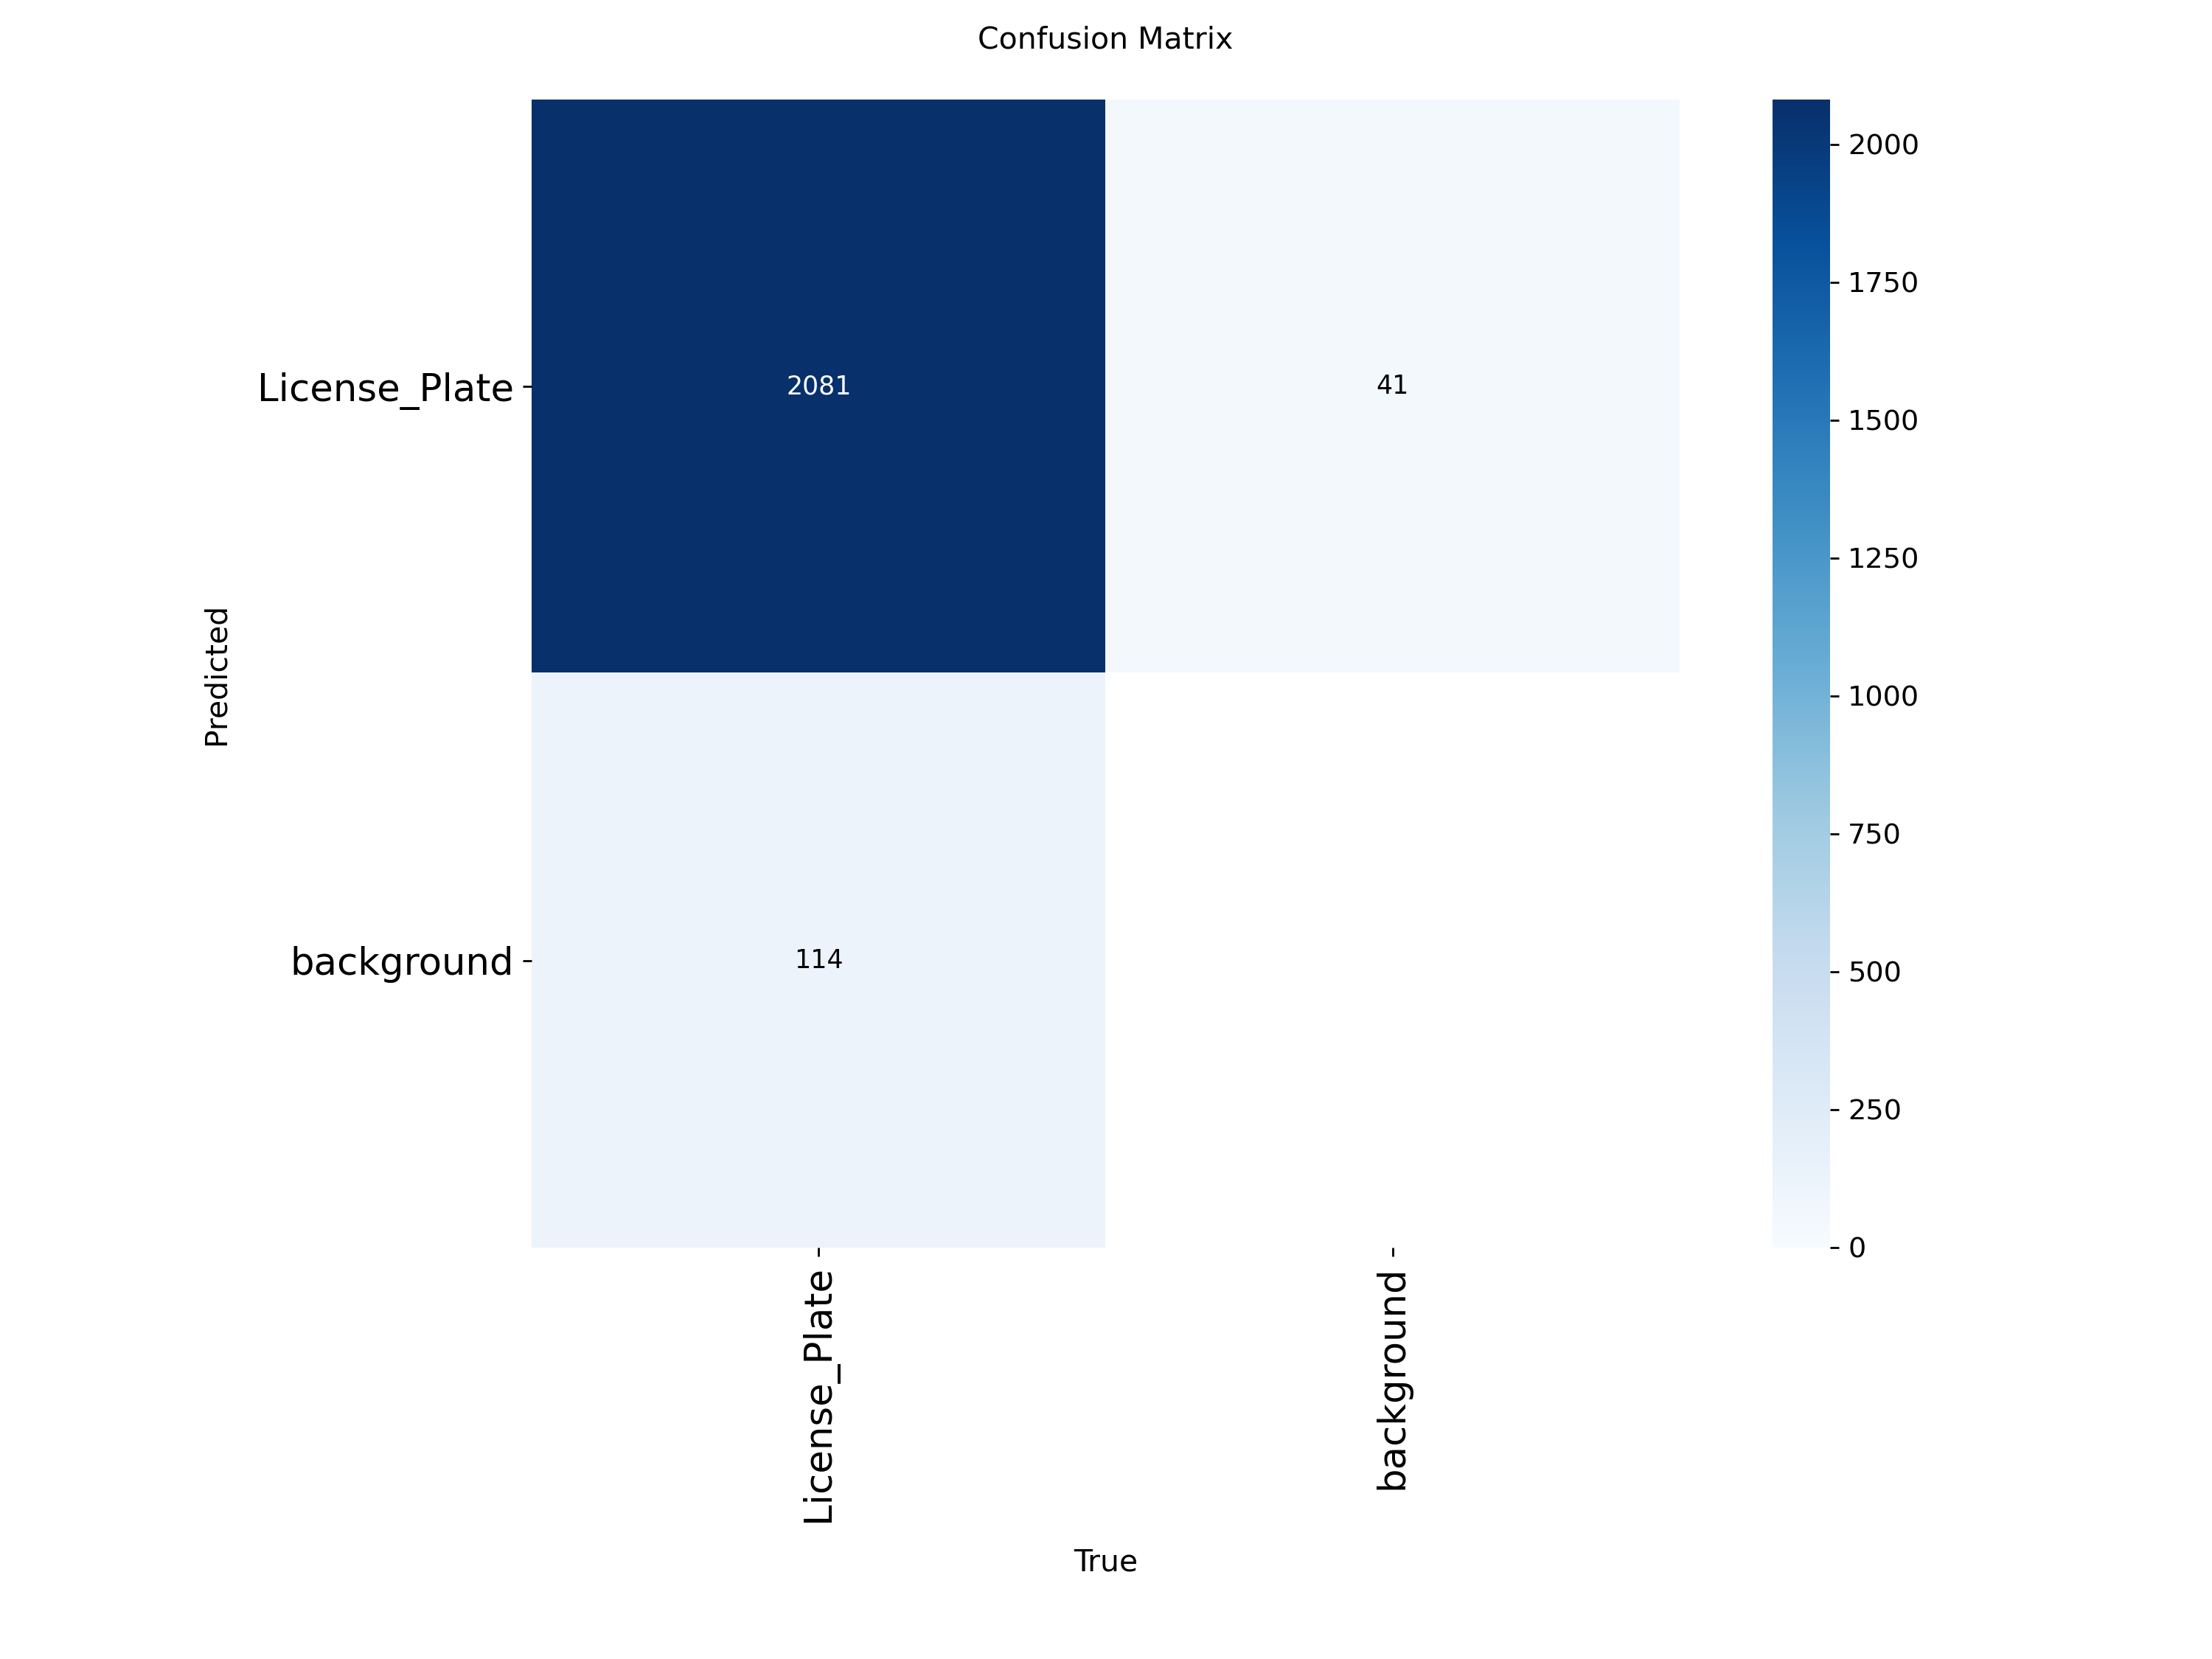

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/confusion_matrix.png', width=600)

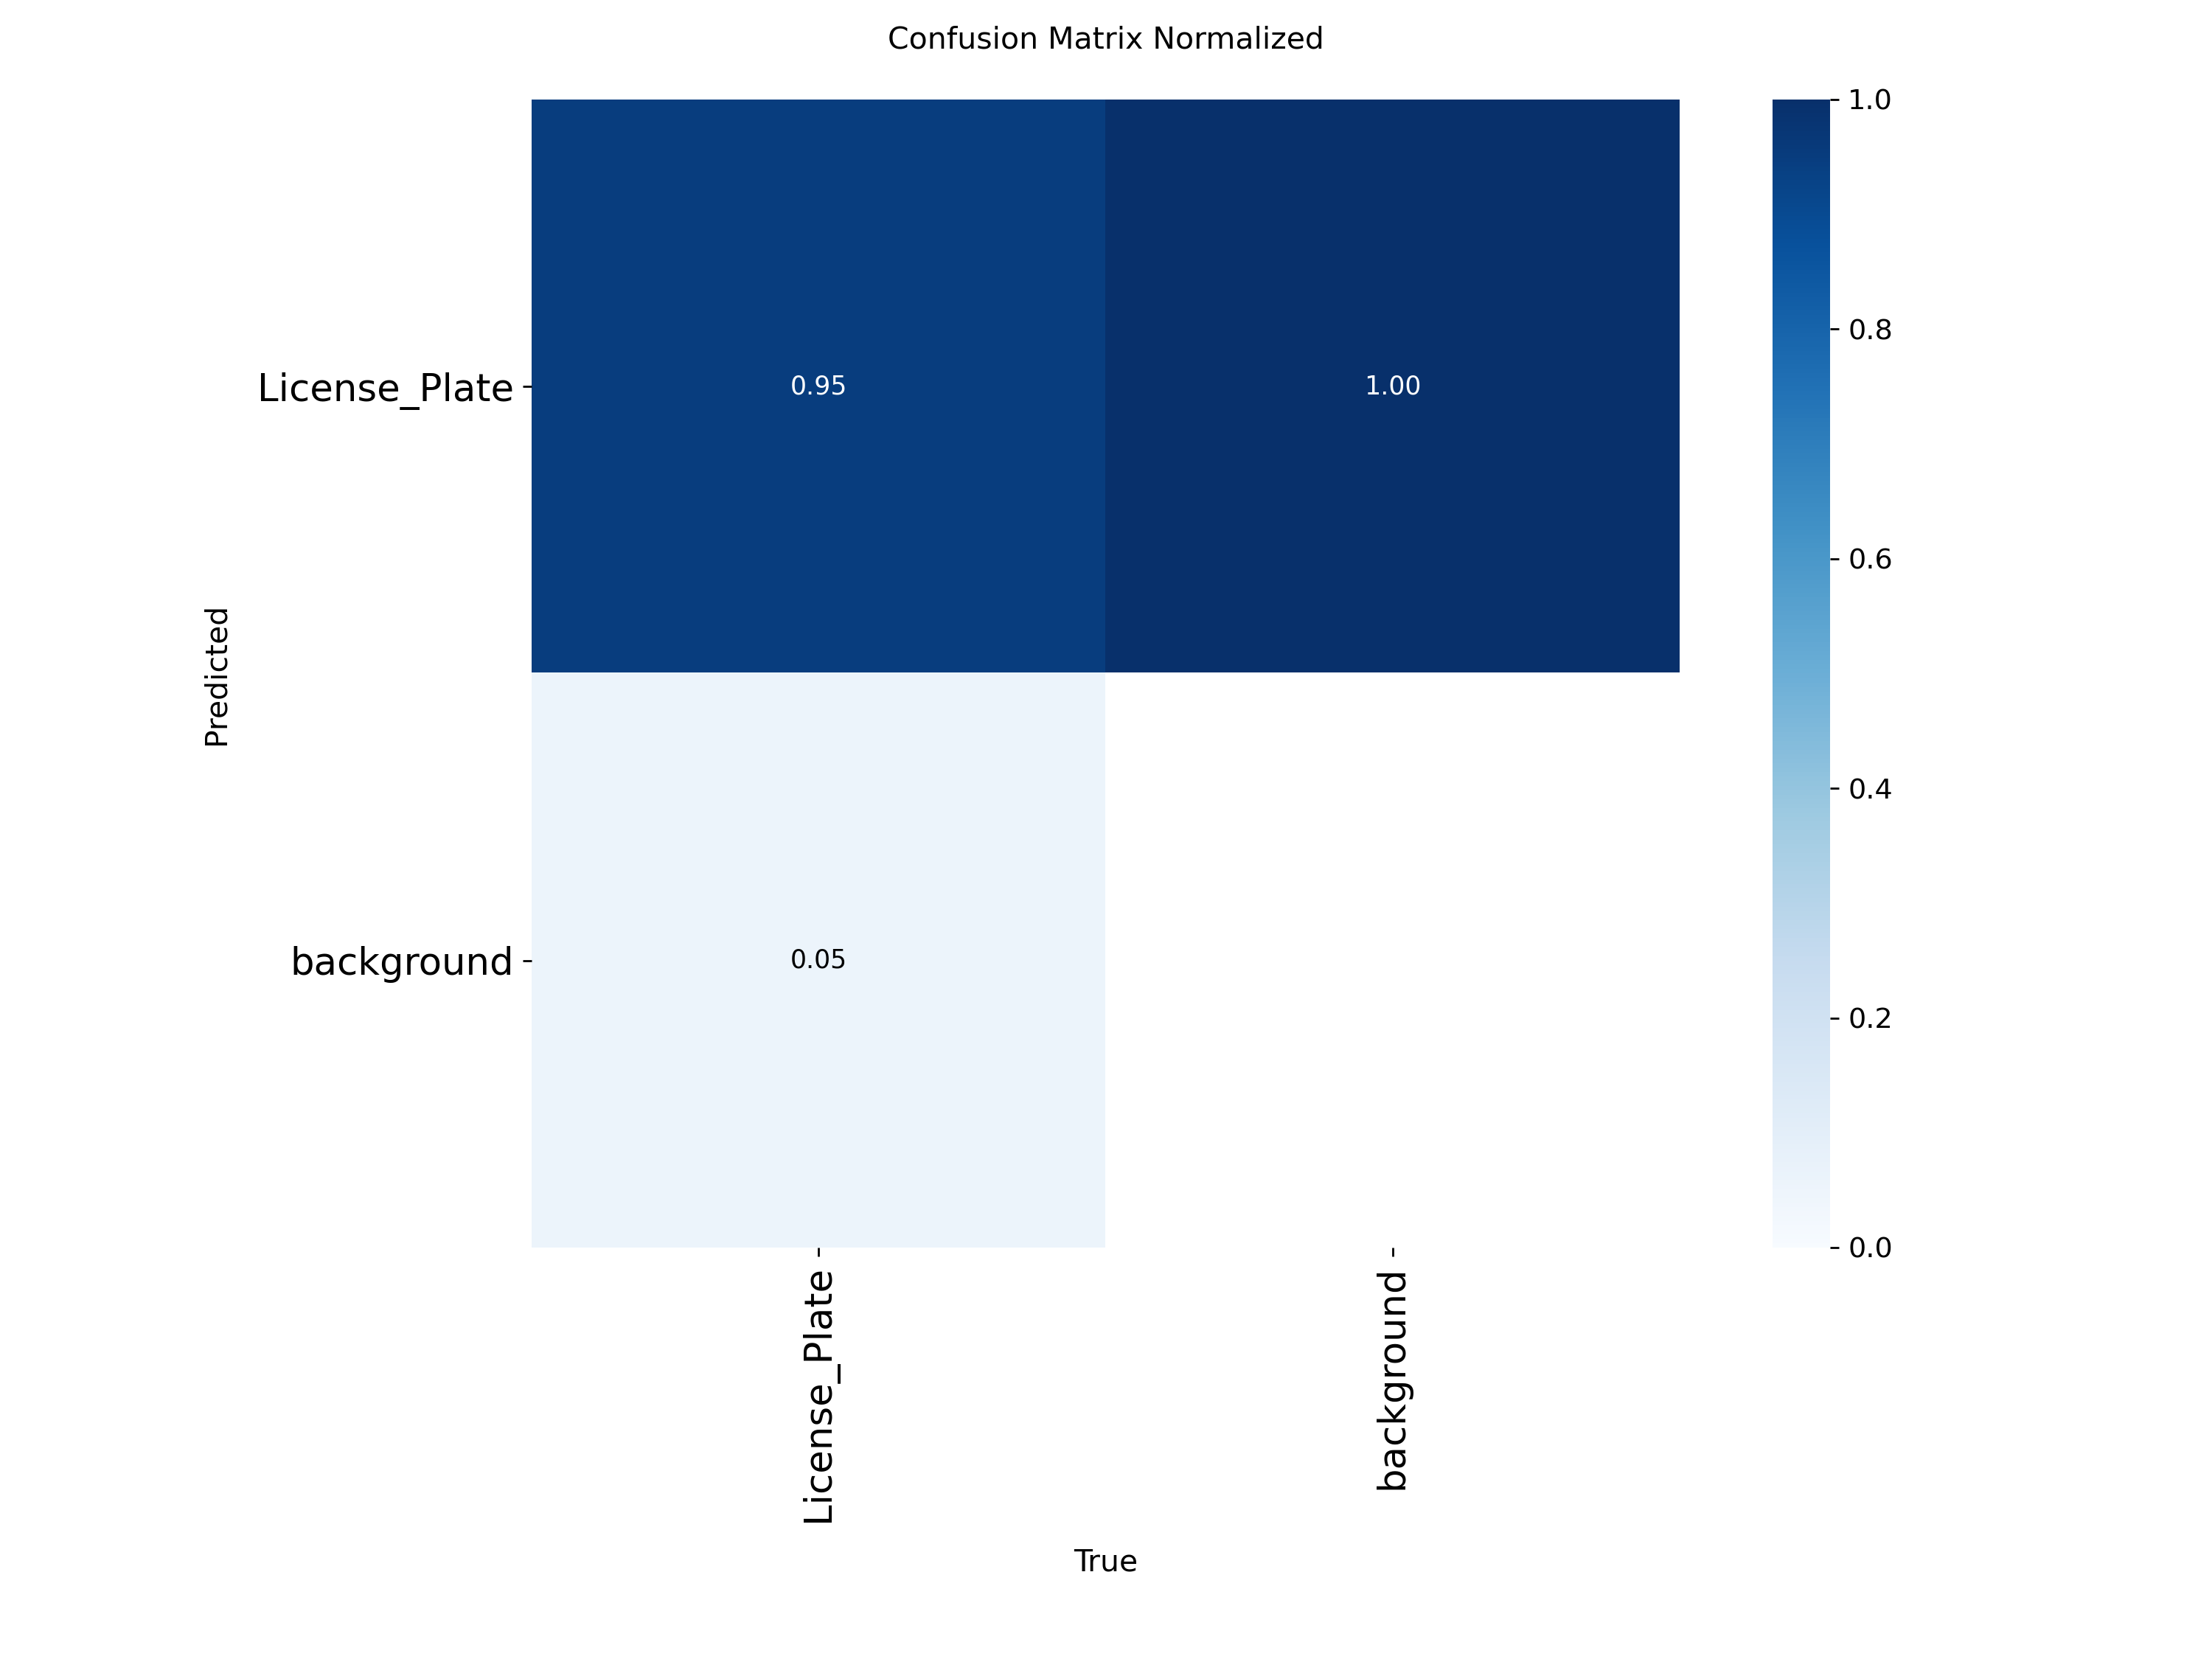

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/confusion_matrix_normalized.png', width=600)

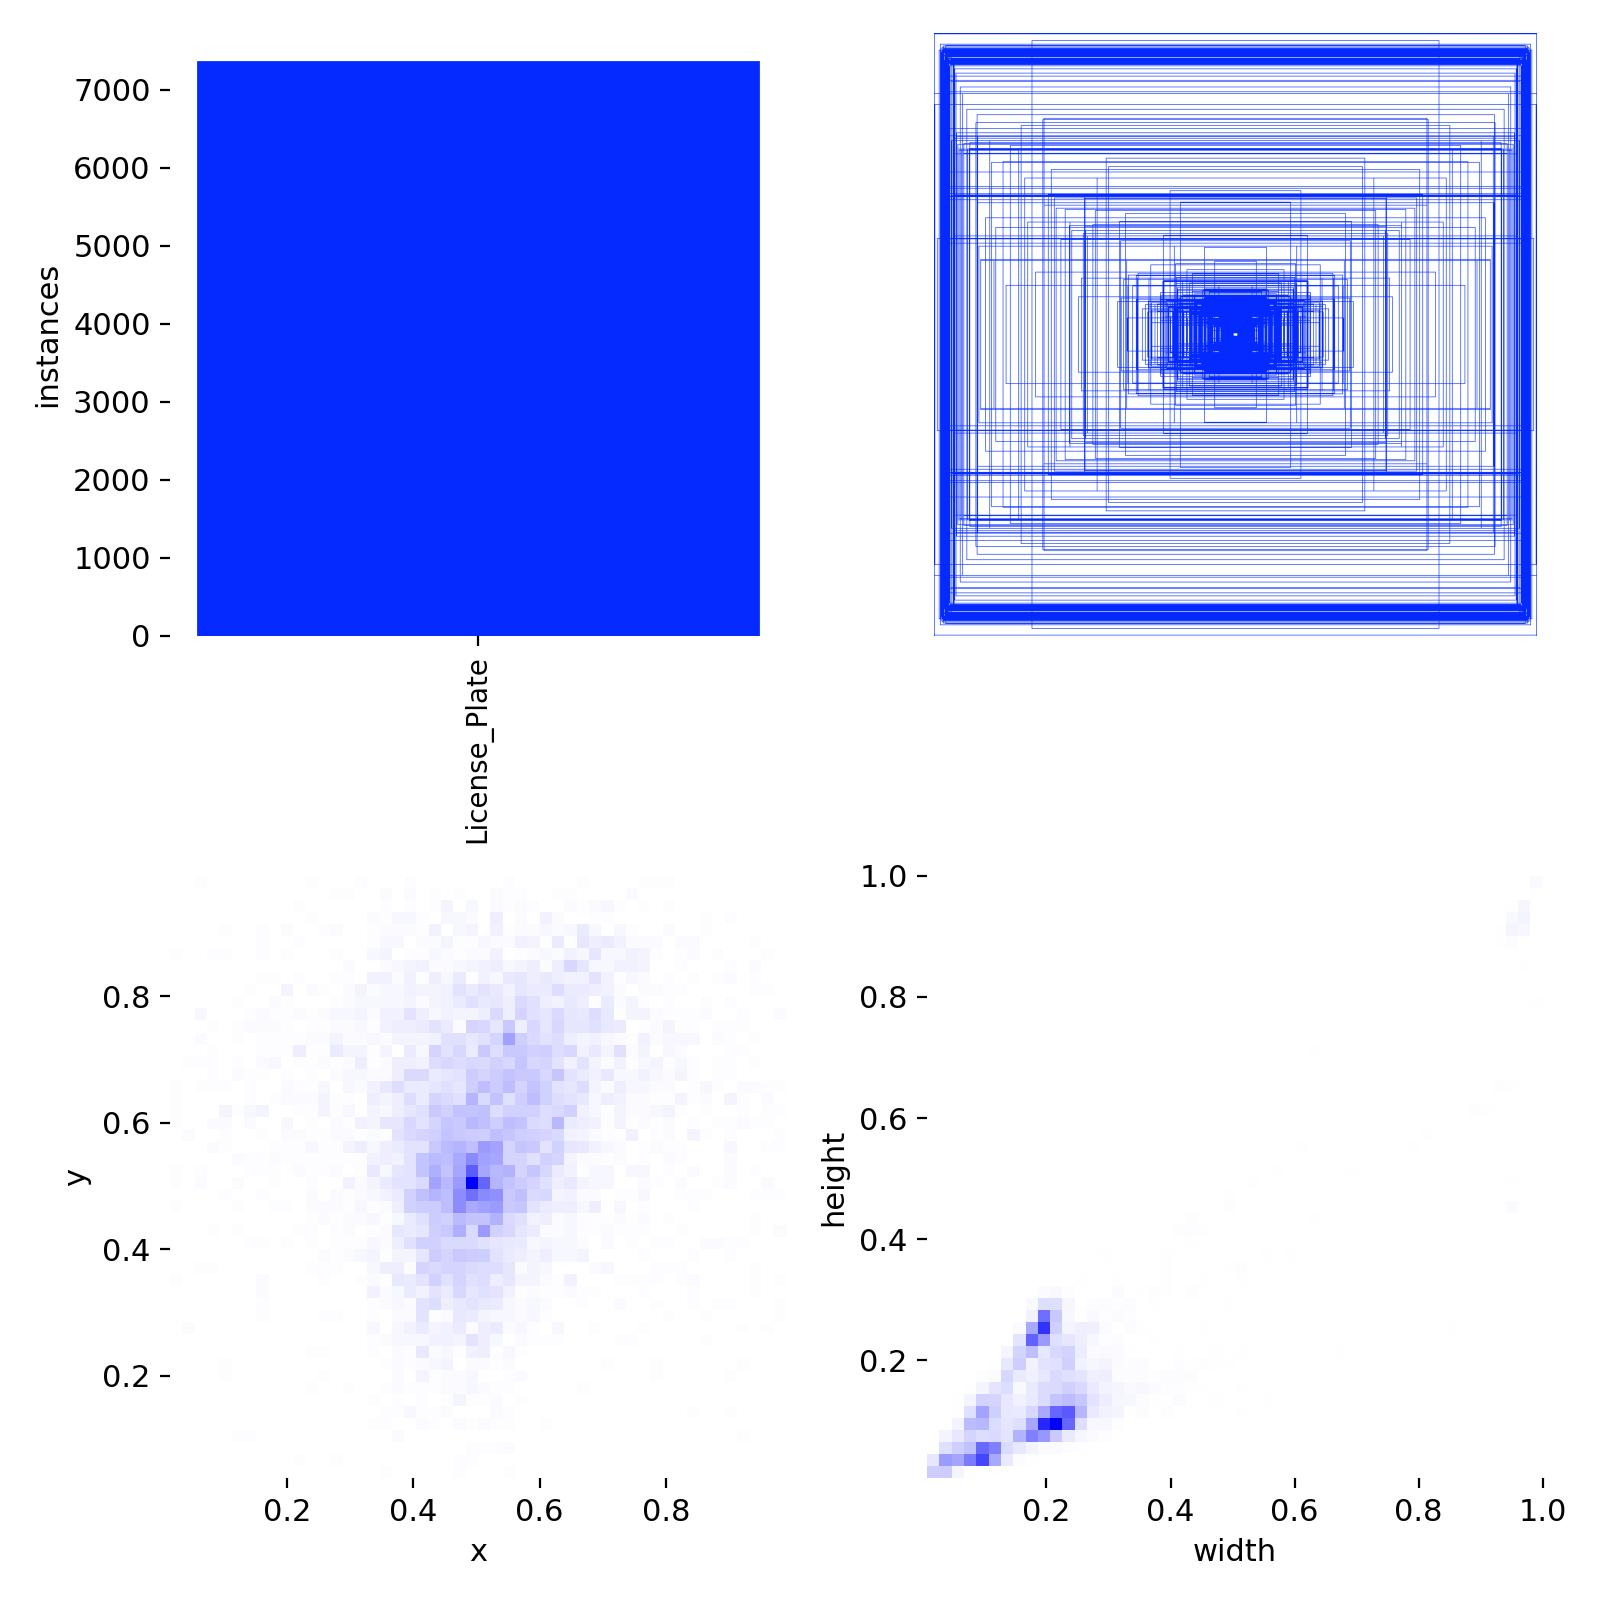

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/labels.jpg', width=600)

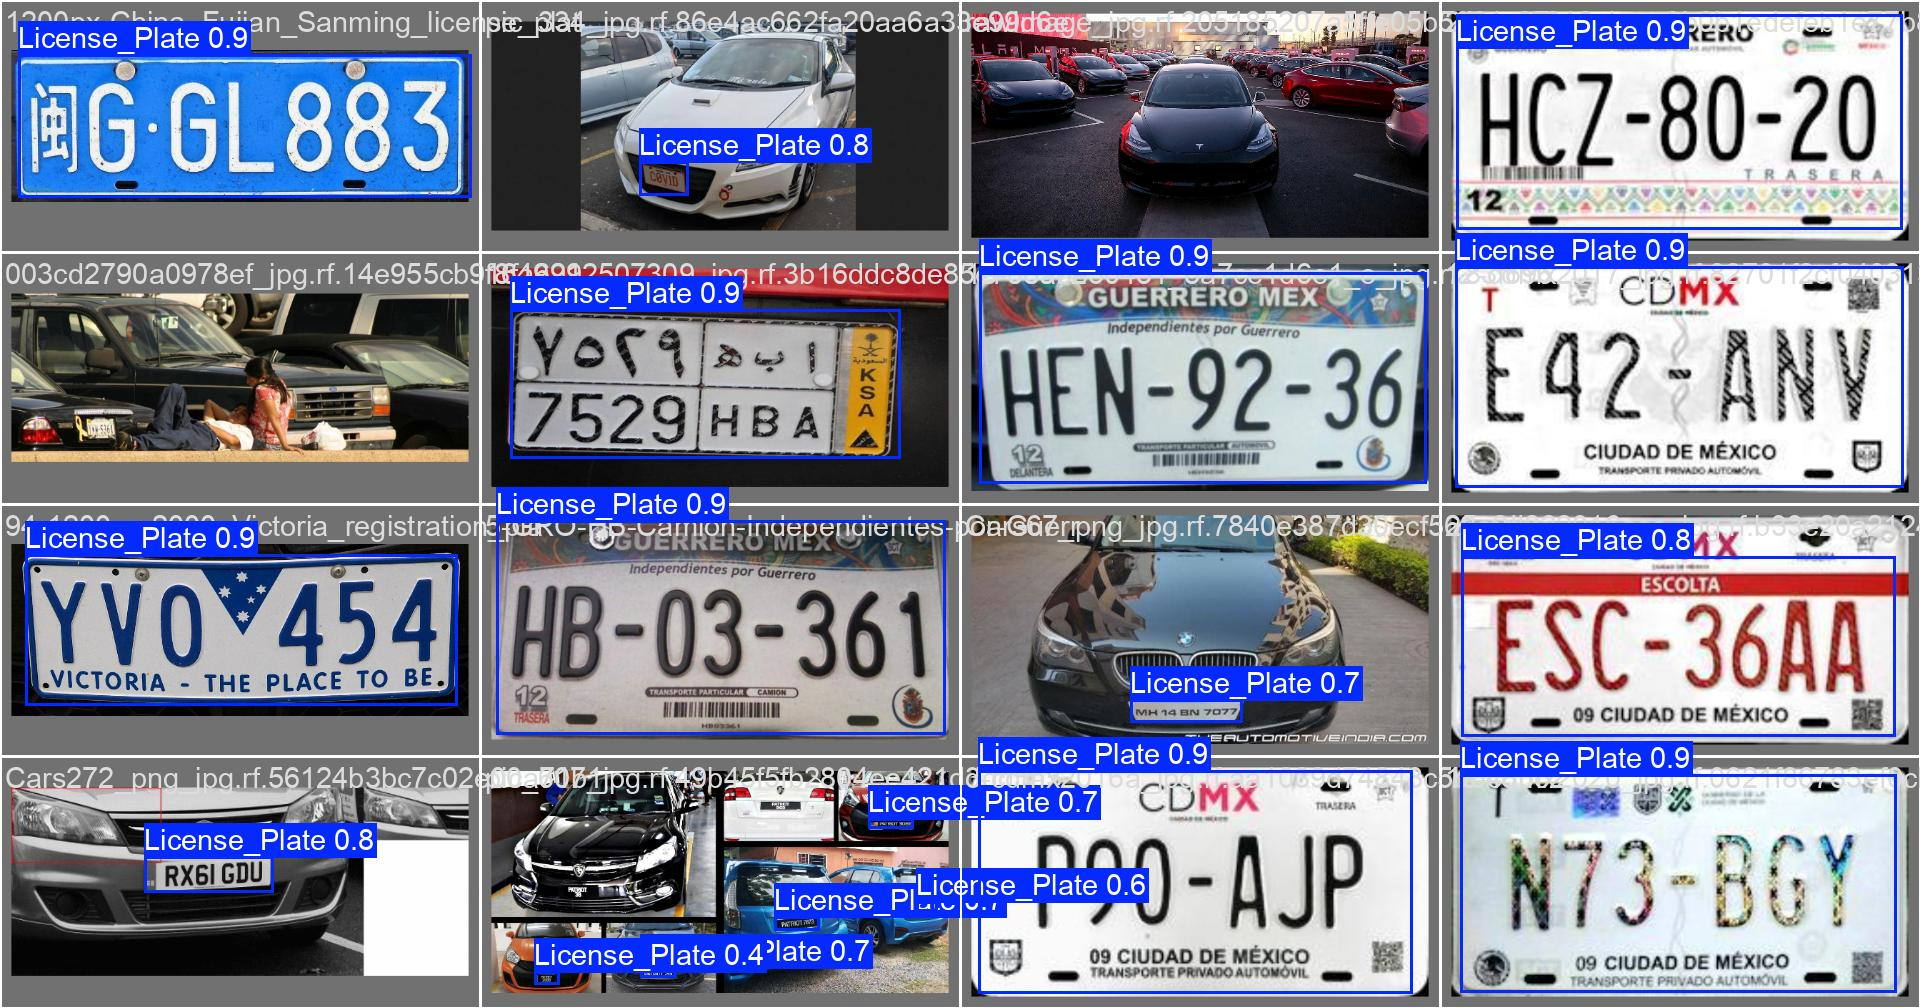

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/val_batch0_pred.jpg', width=600)

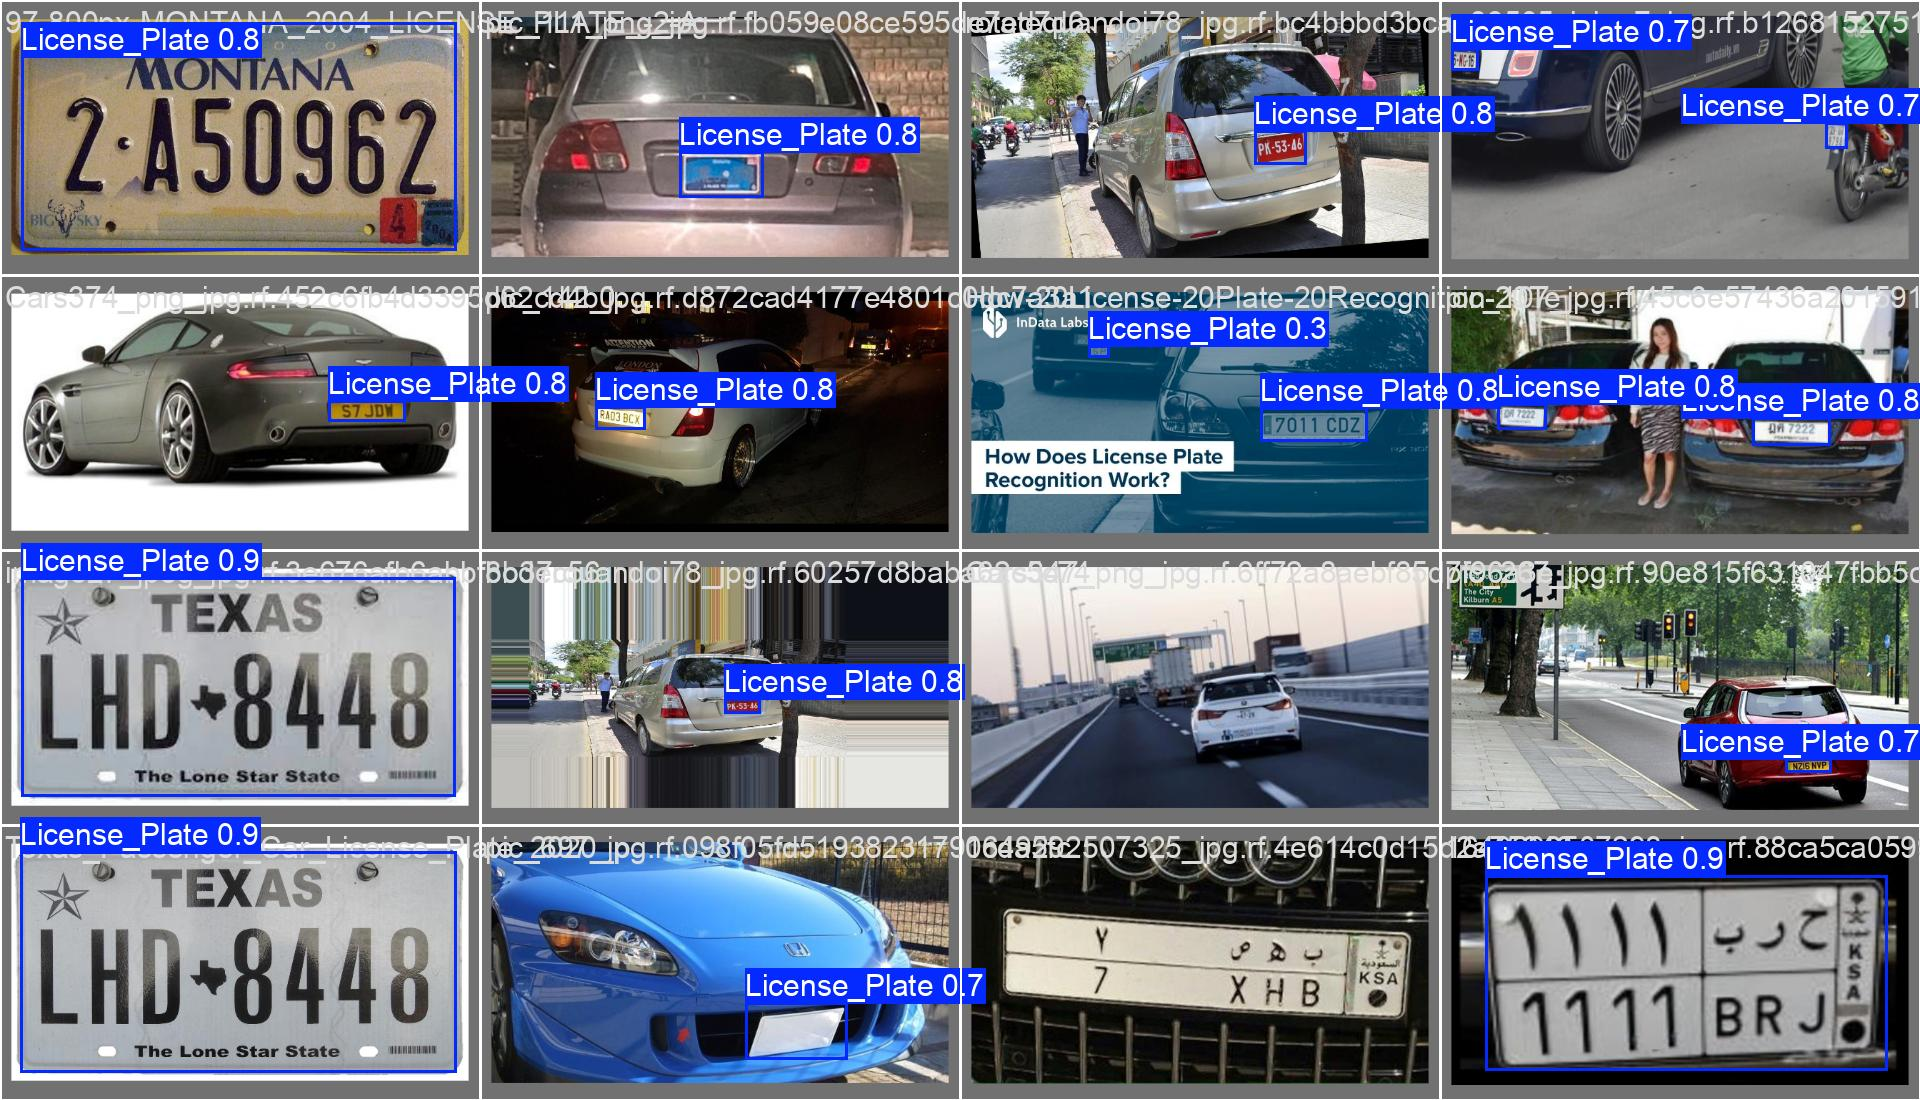

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/val_batch1_pred.jpg', width=600)

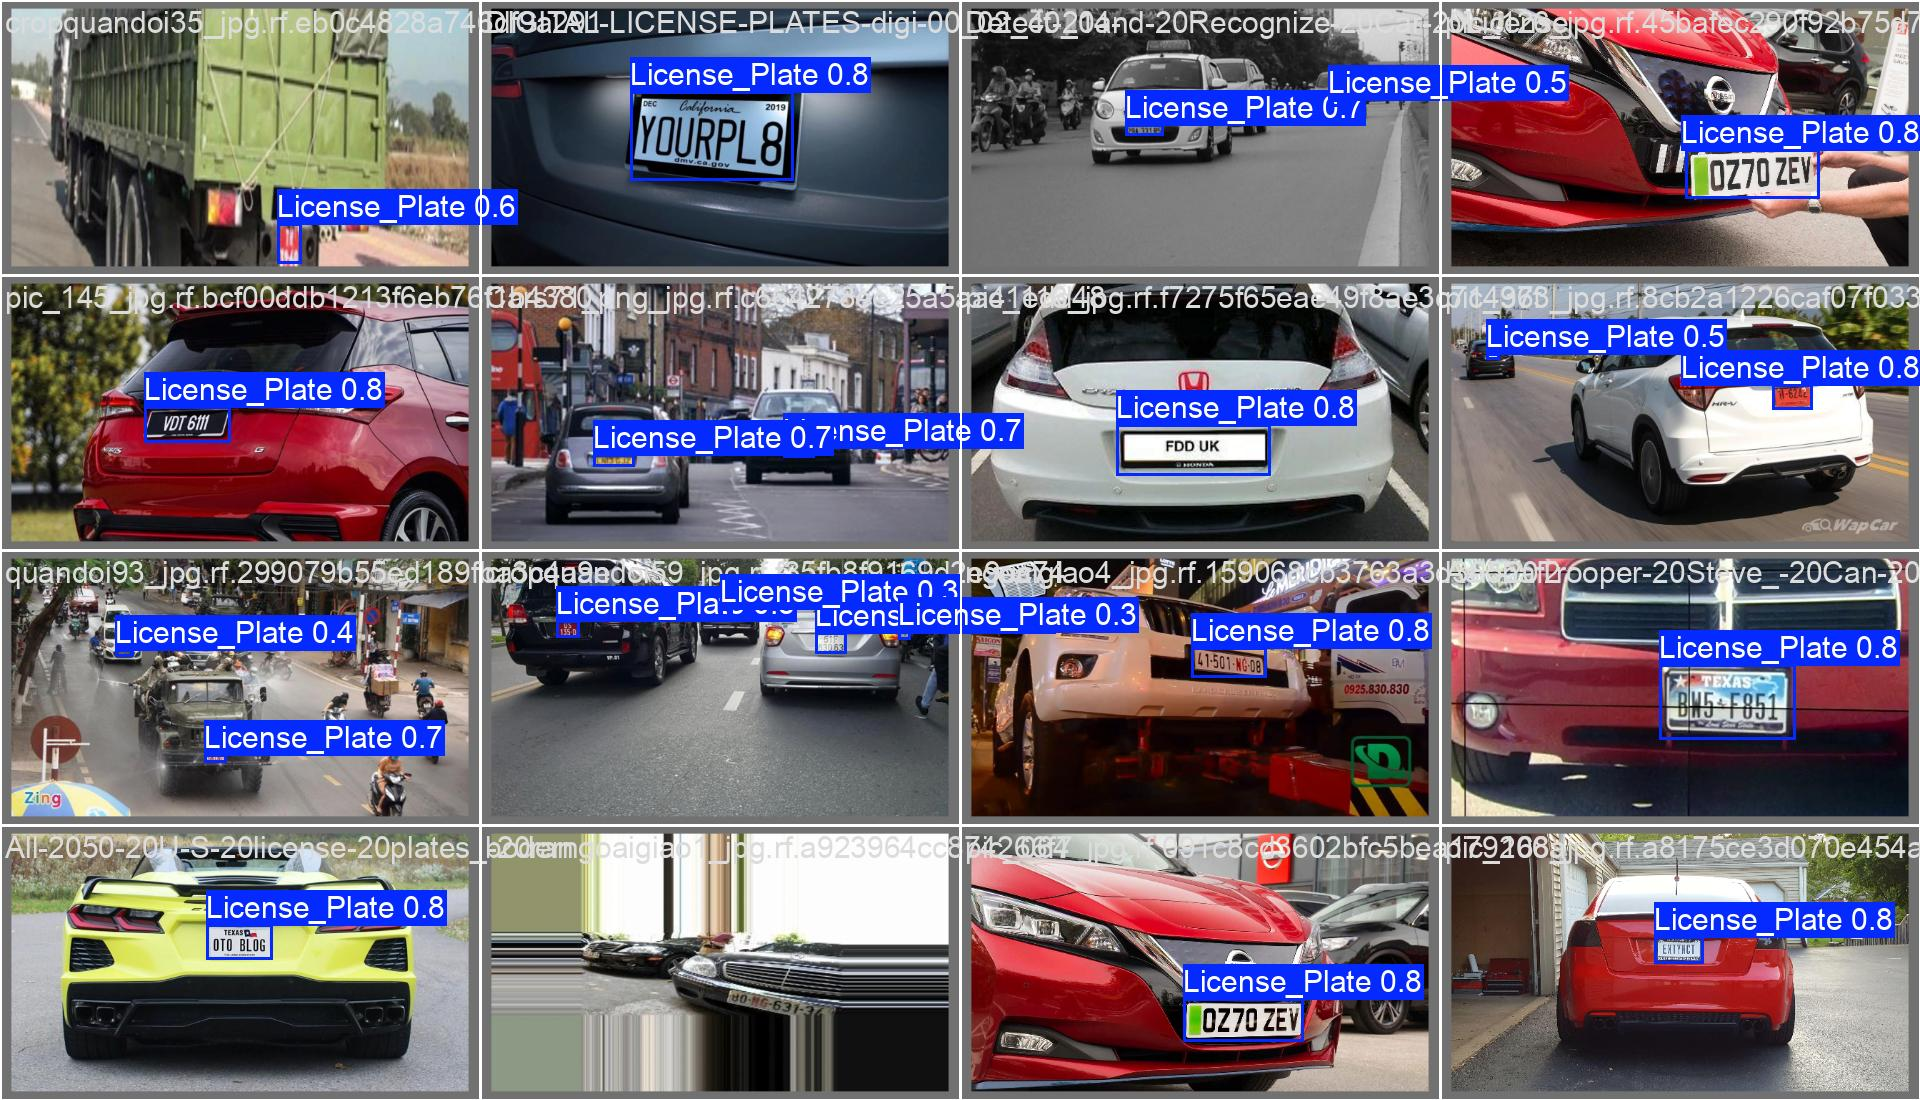

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/val_batch2_pred.jpg', width=600)

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/F1_curve.png', width=600)

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/F1_curve.png', width=600)

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/F1_curve.png', width=600)

In [ ]:
import IPython
IPython.display.Image(filename='/content/runs/detect/num-plate-detection/F1_curve.png', width=600)

In [ ]:
# Display the content of the data.yaml file
with open('/content/bone-fracture-detection-3/data.yaml', 'r') as file:
    print(file.read())

names:
- bone fracture
- not fracture
nc: 2
roboflow:
  license: CC BY 4.0
  project: bone-fracture-detection-rkuqr
  url: https://universe.roboflow.com/fyp-l87nq/bone-fracture-detection-rkuqr/dataset/3
  version: 3
  workspace: fyp-l87nq
test:/content/bone-fracture-detection-3/test/images
train:/content/bone-fracture-detection-3/train/images
val:/content/bone-fracture-detection-3/valid/images
